In [45]:
import sounddevice as sd
import os
import winsound
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.fftpack import fft, fftshift

In [74]:
fs = 44100

In [47]:
file = "anovo.wav"

In [48]:
sd.default.samplerate = 44100
audio, samplerate = sf.read(file)
nAudio = audio[:,1]
sd.play(nAudio)

Text(0.5, 1.0, 'Áudio Original')

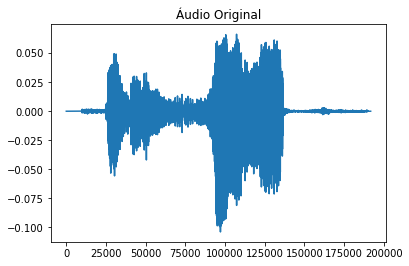

In [66]:
plt.plot(nAudio)
plt.title('Áudio Original')

In [50]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [51]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

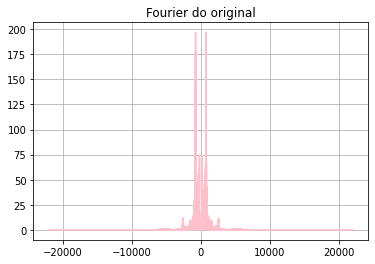

In [67]:
X, Y = calcFFT(nAudio, fs)
plt.plot(X, np.abs(Y), color='pink')
plt.title("Fourier do original")
plt.grid()

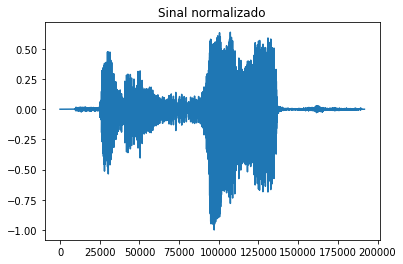

In [53]:
normAudio = nAudio/-min(nAudio)
plt.title("Sinal normalizado")
plt.plot(normAudio)

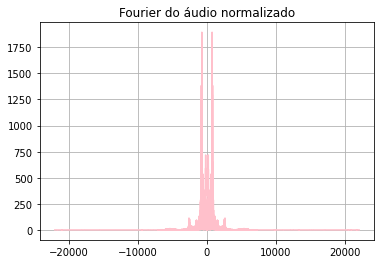

In [68]:
X, Y = calcFFT(normAudio, fs)
plt.plot(X, np.abs(Y), color="pink")
plt.title("Fourier do áudio normalizado")
plt.grid()

Text(0.5, 1.0, 'Áudio filtrado nas frequências altas')

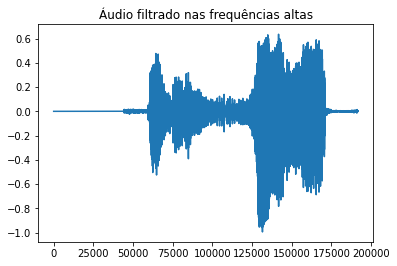

In [69]:
yFitrado = LPF(normAudio, 4000, fs)
plt.plot(yFitrado)
plt.title('Áudio filtrado nas frequências altas')

In [80]:
sd.play(yFitrado) #SOM OPACO :)

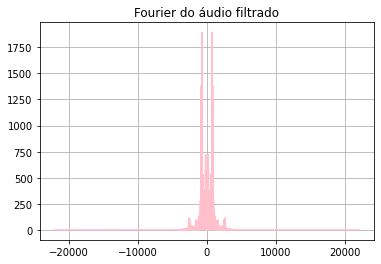

In [70]:
X, Y = calcFFT(yFitrado, fs)
plt.plot(X, np.abs(Y), color="pink")
plt.title('Fourier do áudio filtrado')
plt.grid()

Text(0.5, 1.0, 'Sinal modulado')

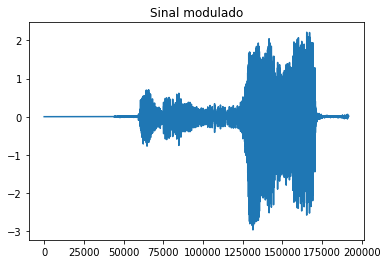

In [77]:
portadora = 14000
portadoraSig = portadora*np.cos(2*np.pi*portadora)
t = np.linspace(0, len(nAudio)/fs, len(nAudio))
yMod = yFitrado*portadoraSig*t
plt.plot(yMod)
plt.title('Sinal modulado')

Text(0.5, 1.0, 'Fourier do modulado')

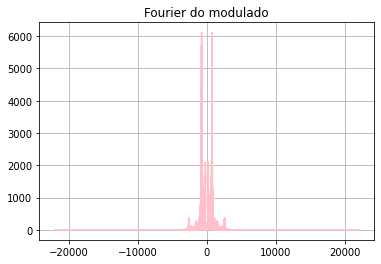

In [78]:
X, Y = calcFFT(yMod, fs)
plt.plot(X, np.abs(Y), color="pink")
plt.grid()
plt.title('Fourier do modulado')

In [79]:
sd.play(yMod) #Não sei porque tá dando pra ouvir